# stock price prediction project

In [1]:
#importing packages

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data


In [3]:
#we are taking data of APPLE company from 2016 to today i.e 2021-oct-31  

In [6]:
start = '2016-01-01'
end = '2021-10-31'

df = data.DataReader('AAPL','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-12-31,26.757500,26.205000,26.752501,26.315001,163649200.0,24.164383
2016-01-04,26.342501,25.500000,25.652500,26.337500,270597600.0,24.185045
2016-01-05,26.462500,25.602501,26.437500,25.677500,223164000.0,23.578979
2016-01-06,25.592501,24.967501,25.139999,25.174999,273829600.0,23.117552
2016-01-07,25.032499,24.107500,24.670000,24.112499,324377600.0,22.141884


In [5]:
# it is giving data upto given dates 

In [6]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-10-25,149.369995,147.619995,148.679993,148.639999,50720600.0,148.017044
2021-10-26,150.839996,149.009995,149.330002,149.320007,60893400.0,148.694199
2021-10-27,149.729996,148.490005,149.360001,148.850006,56094900.0,148.226166
2021-10-28,153.169998,149.720001,149.820007,152.570007,100077900.0,151.930588
2021-10-29,149.940002,146.410004,147.220001,149.800003,124953200.0,149.172180


In [7]:
#resting dates using 'reset_index'

In [8]:
df =df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-12-31,26.757500,26.205000,26.752501,26.315001,163649200.0,24.164381
1,2016-01-04,26.342501,25.500000,25.652500,26.337500,270597600.0,24.185041
2,2016-01-05,26.462500,25.602501,26.437500,25.677500,223164000.0,23.578983
3,2016-01-06,25.592501,24.967501,25.139999,25.174999,273829600.0,23.117548
4,2016-01-07,25.032499,24.107500,24.670000,24.112499,324377600.0,22.141884


In [9]:
#droping unwanted cloumns those are  date and Adj Close
#using drop function

In [10]:
df = df.drop(['Date','Adj Close'],axis=1)
df.head()

,High,Low,Open,Close,Volume
0,26.757500,26.205000,26.752501,26.315001,163649200.0
1,26.342501,25.500000,25.652500,26.337500,270597600.0
2,26.462500,25.602501,26.437500,25.677500,223164000.0
3,25.592501,24.967501,25.139999,25.174999,273829600.0
4,25.032499,24.107500,24.670000,24.112499,324377600.0


In [11]:
#sharemarket closing value is important so,first i a plotting close market graph

In [12]:
#graph uses "matplotlib.pyplot" 

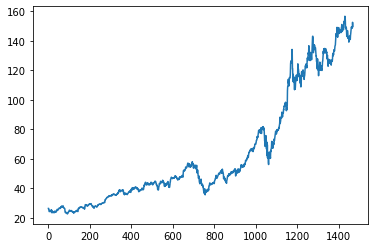

In [13]:
plt.plot(df.Close)

In [14]:
df


,High,Low,Open,Close,Volume
0,26.757500,26.205000,26.752501,26.315001,163649200.0
1,26.342501,25.500000,25.652500,26.337500,270597600.0
2,26.462500,25.602501,26.437500,25.677500,223164000.0
3,25.592501,24.967501,25.139999,25.174999,273829600.0
4,25.032499,24.107500,24.670000,24.112499,324377600.0
...,...,...,...,...,...
1464,149.369995,147.619995,148.679993,148.639999,50720600.0
1465,150.839996,149.009995,149.330002,149.320007,60893400.0
1466,149.729996,148.490005,149.360001,148.850006,56094900.0
1467,153.169998,149.720001,149.820007,152.570007,100077900.0


In [15]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1464    143.6478
1465    143.8821
1466    144.1116
1467    144.3699
1468    144.5966
Name: Close, Length: 1469, dtype: float64

In [16]:
# ploting mean avg of except first 100 days i.e ma100
#plt.plot(ma100,'r'):r->red,g->green,y->yellow etc...

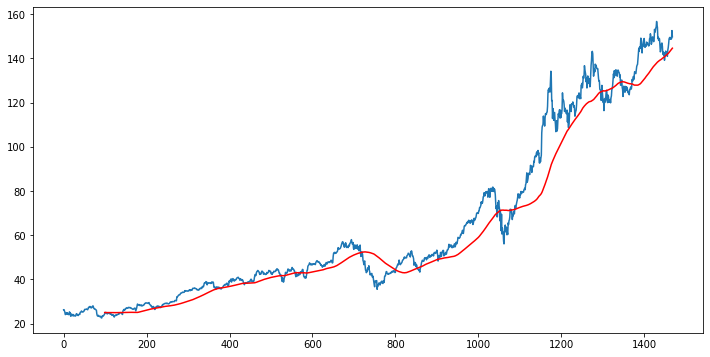

In [17]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [18]:
# ploting mean avg of except first 200 days i.e ma100

In [19]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
1464    136.10630
1465    136.20800
1466    136.30825
1467    136.41665
1468    136.52110
Name: Close, Length: 1469, dtype: float64

In [20]:
#plotting both ma100 and ma200 in the same graph

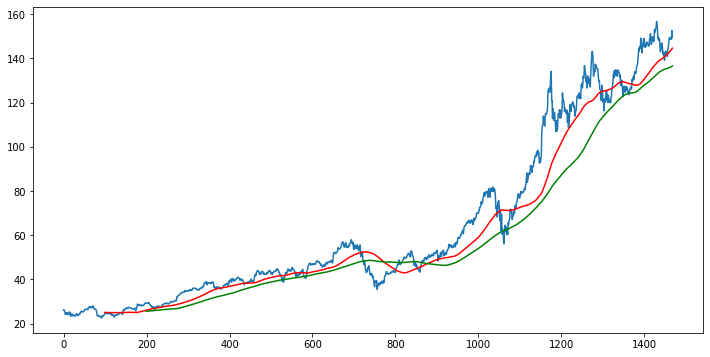

In [21]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [22]:
df.shape

(1469, 5)

In [23]:
#splitting our data to training and testing


In [24]:
data_train = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_test= pd.DataFrame(df['Close'][int(len(df)*0.70) :int(len(df))])
print(data_train.shape)
print(data_test.shape)      

(1028, 1)
(441, 1)


In [25]:
data_train.head()

,Close
0,26.315001
1,26.337500
2,25.677500
3,25.174999
4,24.112499


In [26]:
data_test.head()

,Close
1028,77.165001
1029,79.712502
1030,80.362503
1031,81.302498
1032,80.007500


In [27]:
#scalaing the data from 1 to 100

In [28]:
from sklearn import preprocessing

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))


In [30]:
#converting minmaxscaler into an array
#scaler.fit_transform(data_train)->keeps training data into array

In [31]:
data_train_array=scaler.fit_transform(data_train)
data_train_array

array([[0.06376071],
       [0.06414531],
       [0.05286326],
       ...,
       [1.        ],
       [0.99799145],
       [0.93662399]])

In [32]:
data_train_array.shape

(1028, 1)

In [33]:
#now we are dividing our trianing data into x train and y train


In [34]:
x_train=[]
y_train=[]

for i in range(100,data_train_array.shape[0]):
    x_train.append(data_train_array[i-100:i])
    y_train.append(data_train_array[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)

In [35]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [36]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,
               input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

               
model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))               
               

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [38]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
29/29 [==============================] - 9s 171ms/step - loss: 0.0637
Epoch 2/50
29/29 [==============================] - 5s 160ms/step - loss: 0.0122
Epoch 3/50
29/29 [==============================] - 5s 155ms/step - loss: 0.0079
Epoch 4/50
29/29 [==============================] - 5s 157ms/step - loss: 0.0073
Epoch 5/50
29/29 [==============================] - 5s 168ms/step - loss: 0.0062
Epoch 6/50
29/29 [==============================] - 6s 202ms/step - loss: 0.0063
Epoch 7/50
 4/29 [===>..........................] - ETA: 4s - loss: 0.0072

KeyboardInterrupt: 

In [ ]:
model.save('keras_model.h5')

In [ ]:
data_test.head()

,Close
1028,77.165001
1029,79.712502
1030,80.362503
1031,81.302498
1032,80.007500


In [ ]:
data_train.tail(100)

,Close
928,54.174999
929,55.897499
930,55.772499
931,54.687500
932,54.974998
...,...
1023,77.237503
1024,79.422501
1025,81.084999
1026,80.967499


In [ ]:
past_100_days=data_train.tail(100)

In [ ]:
final_df=past_100_days.append(data_test,ignore_index=True)

In [ ]:
final_df.head()

,Close
0,54.174999
1,55.897499
2,55.772499
3,54.687500
4,54.974998


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.        ],
       [0.01680242],
       [0.01558308],
       [0.00499928],
       [0.00780373],
       [0.00975467],
       [0.01480273],
       [0.01038875],
       [0.00251182],
       [0.00492612],
       [0.00238988],
       [0.01055943],
       [0.00777936],
       [0.00517   ],
       [0.01772912],
       [0.01924108],
       [0.00551141],
       [0.01004734],
       [0.02514266],
       [0.0252646 ],
       [0.01877773],
       [0.02519144],
       [0.03265376],
       [0.04757843],
       [0.04674925],
       [0.04540801],
       [0.04309125],
       [0.04531045],
       [0.04806615],
       [0.05806467],
       [0.05672343],
       [0.0645759 ],
       [0.06555139],
       [0.07286739],
       [0.07889091],
       [0.06484416],
       [0.064771  ],
       [0.07818367],
       [0.0954007 ],
       [0.09949764],
       [0.09859534],
       [0.09886356],
       [0.10420425],
       [0.10593576],
       [0.11095941],
       [0.11037407],
       [0.11649515],
       [0.112

In [ ]:
input_data.shape

(541, 1)

In [ ]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [ ]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(441, 100, 1)
(441,)


In [ ]:
#Making predictions
y_predicted = model.predict(x_test)

In [ ]:
y_predicted.shape

(441, 1)

In [ ]:
y_test

array([0.22425987, 0.2491099 , 0.25545045, 0.26461979, 0.25198751,
       0.25569426, 0.25096324, 0.26947279, 0.26379065, 0.26398579,
       0.24947569, 0.26074232, 0.25264592, 0.23496559, 0.19870261,
       0.17407206, 0.18521678, 0.13856506, 0.13817487, 0.20023898,
       0.17709605, 0.20982293, 0.18587527, 0.17638882, 0.12064092,
       0.16739013, 0.14322293, 0.07689118, 0.14941716, 0.06221043,
       0.08818222, 0.07308687, 0.06847779, 0.03058091, 0.01870457,
       0.073599  , 0.07028241, 0.10178999, 0.07569626, 0.09293762,
       0.0916695 , 0.05904015, 0.06884357, 0.06025949, 0.11161782,
       0.10420425, 0.12039704, 0.12507924, 0.13790665, 0.17156023,
       0.16517094, 0.17068235, 0.1611959 , 0.14688093, 0.12600594,
       0.14485687, 0.14224748, 0.1616105 , 0.16209826, 0.15090472,
       0.17321858, 0.18802124, 0.17648639, 0.18646053, 0.19719065,
       0.20467738, 0.2122616 , 0.22784472, 0.23974543, 0.23096621,
       0.2217968 , 0.22640591, 0.22194311, 0.23962345, 0.23518

In [ ]:
y_predicted

array([[0.27408972],
       [0.27605185],
       [0.27767196],
       [0.2790327 ],
       [0.28028065],
       [0.28149363],
       [0.28272286],
       [0.28396612],
       [0.28529194],
       [0.28673792],
       [0.2883091 ],
       [0.28990543],
       [0.2914655 ],
       [0.29289377],
       [0.29401144],
       [0.29457402],
       [0.29445916],
       [0.29368567],
       [0.2923196 ],
       [0.29046696],
       [0.28827018],
       [0.28586498],
       [0.2833801 ],
       [0.28091276],
       [0.27853096],
       [0.27625337],
       [0.27409786],
       [0.27206233],
       [0.2699976 ],
       [0.26786363],
       [0.26546162],
       [0.26263803],
       [0.25931478],
       [0.2554441 ],
       [0.25083107],
       [0.24499446],
       [0.23727557],
       [0.22717822],
       [0.21470088],
       [0.20037413],
       [0.18459293],
       [0.16877204],
       [0.15422267],
       [0.14152844],
       [0.13064295],
       [0.12148656],
       [0.11396244],
       [0.107

In [ ]:
scaler.scale_

array([0.00975467])

In [ ]:
scale_factor=1/0.00975467
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

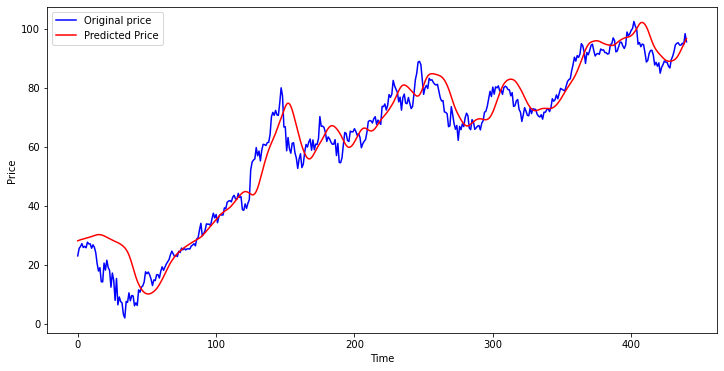

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [1]:
pip install linear-regression


Note: you may need to restart the kernel to use updated packages.


In [7]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(df[['High']],df['Low'])

LinearRegression()

In [8]:
reg.coef_


array([0.97578864])

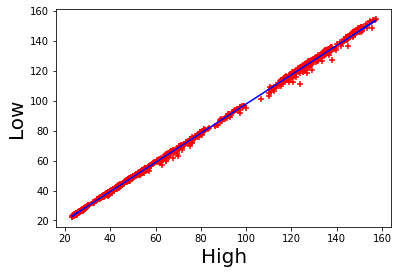

In [9]:
%matplotlib inline
plt.xlabel('High',fontsize=20)
plt.ylabel('Low',fontsize=20)

plt.scatter(df.High,df.Low,color='red',marker='+')
plt.plot(df.High,reg.predict(df[['High']]),color='blue')
